# Importing Libraries and Dataset

In [ ]:
! pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

start = datetime.date(2014, 8, 1)
end = datetime.date(2016, 11, 30)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2016-11-15,36.500000,37.339001,36.299500,37.161999,37.161999,135116000,AMAZON
2016-11-16,36.993999,37.493500,36.780499,37.324501,37.324501,72976000,AMAZON
2016-11-17,37.466000,37.875000,37.400002,37.820000,37.820000,73802000,AMAZON
2016-11-18,38.049999,38.387001,37.882000,38.007999,38.007999,87468000,AMAZON
2016-11-21,38.299999,39.017502,38.255501,39.000000,39.000000,92292000,AMAZON
2016-11-22,39.408501,39.619999,39.049999,39.266499,39.266499,106226000,AMAZON
2016-11-23,39.086498,39.087502,38.655998,39.006001,39.006001,70806000,AMAZON
2016-11-25,39.325001,39.337502,38.895000,39.018501,39.018501,36742000,AMAZON
2016-11-28,38.849499,38.849998,38.212002,38.338501,38.338501,88776000,AMAZON


In [2]:
df.reset_index(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2014-08-01,23.725000,24.155001,23.702499,24.032499,21.313589,194044000,APPLE
1,2014-08-04,24.092501,24.145000,23.792500,23.897499,21.193857,159832000,APPLE
2,2014-08-05,23.840000,23.920000,23.590000,23.780001,21.089655,223732000,APPLE
3,2014-08-06,23.687500,23.870001,23.677500,23.740000,21.054176,154232000,APPLE
4,2014-08-07,23.732500,23.987499,23.525000,23.620001,21.051950,186844000,APPLE
...,...,...,...,...,...,...,...,...
2347,2016-11-22,39.408501,39.619999,39.049999,39.266499,39.266499,106226000,AMAZON
2348,2016-11-23,39.086498,39.087502,38.655998,39.006001,39.006001,70806000,AMAZON
2349,2016-11-25,39.325001,39.337502,38.895000,39.018501,39.018501,36742000,AMAZON
2350,2016-11-28,38.849499,38.849998,38.212002,38.338501,38.338501,88776000,AMAZON


# Statistics

PCF

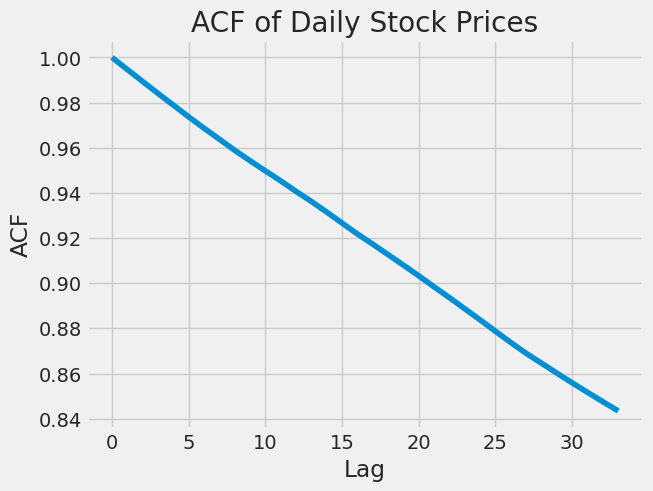

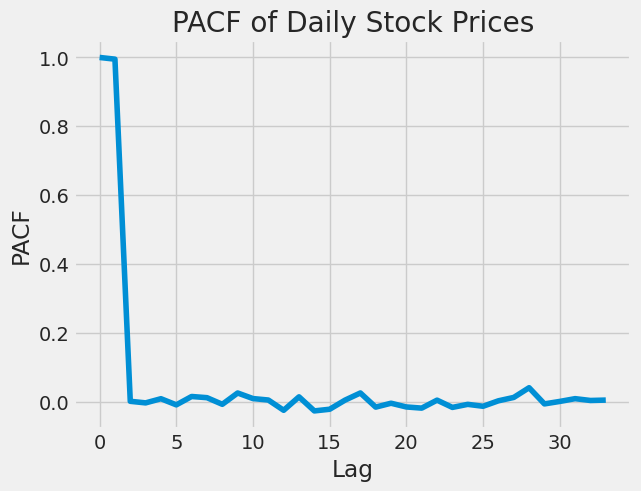

ADF Test Results:
p-value: 0.10751764455065083
ADF Statistic: -2.53357387065479


In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf, adfuller

acf_values = acf(df['Close'])
pacf_values = pacf(df['Close'])

# Plot the ACF and PACF
import matplotlib.pyplot as plt

plt.plot(acf_values)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('ACF of Daily Stock Prices')
plt.show()

plt.plot(pacf_values)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('PACF of Daily Stock Prices')
plt.show()

adf_result = adfuller(df['Close'])

print('ADF Test Results:')
print('p-value:', adf_result[1])
print('ADF Statistic:', adf_result[0])


# Plotting the Closing Prices

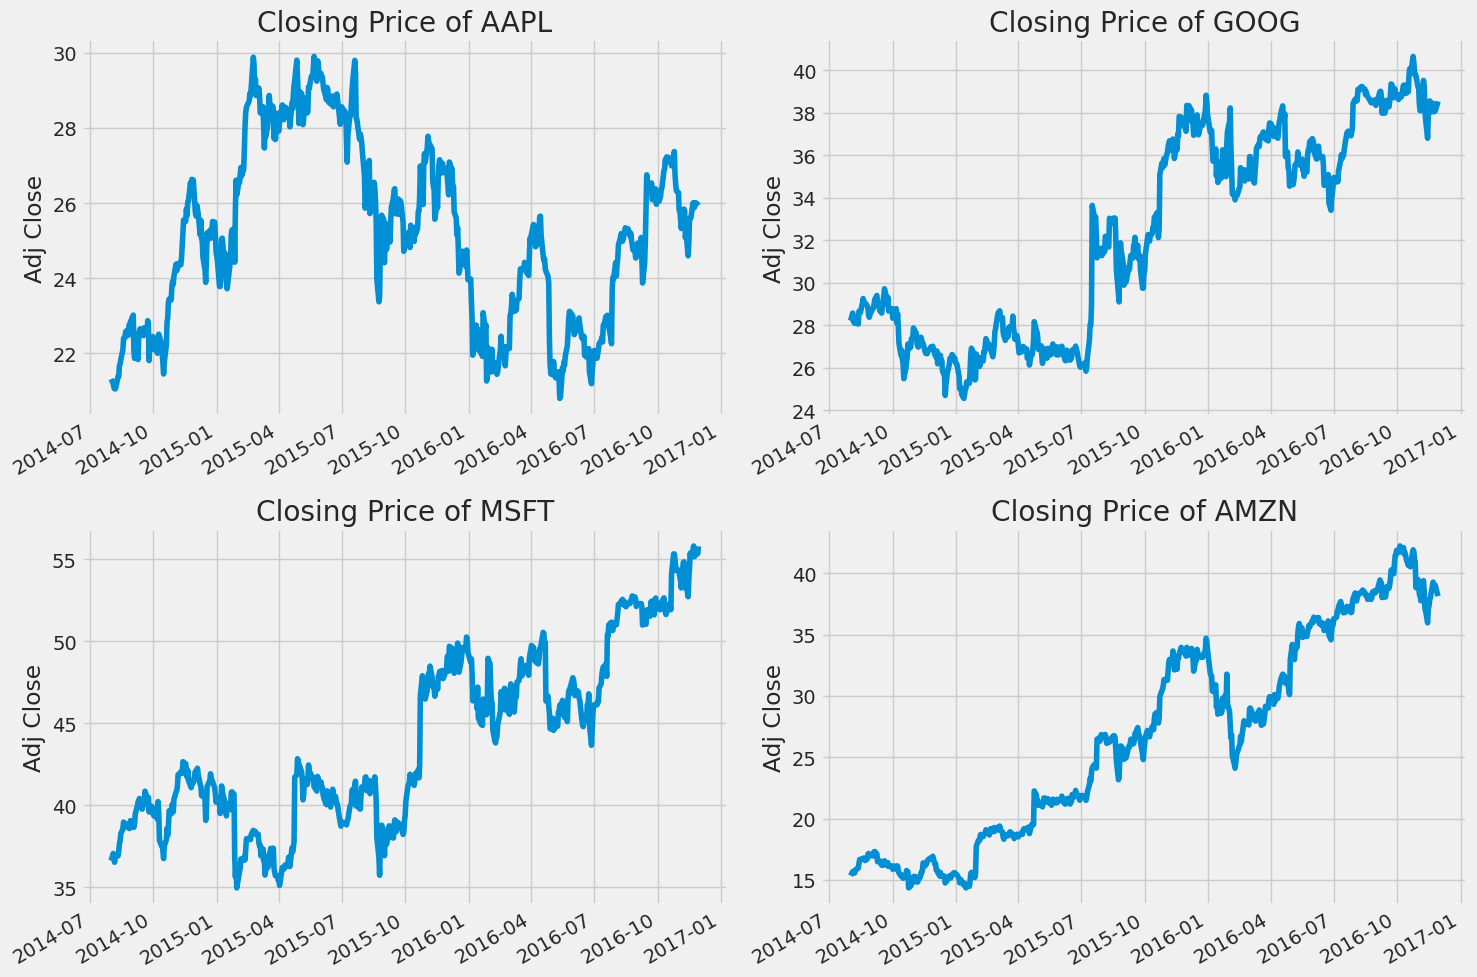

In [3]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


# Plotting Sales Volume

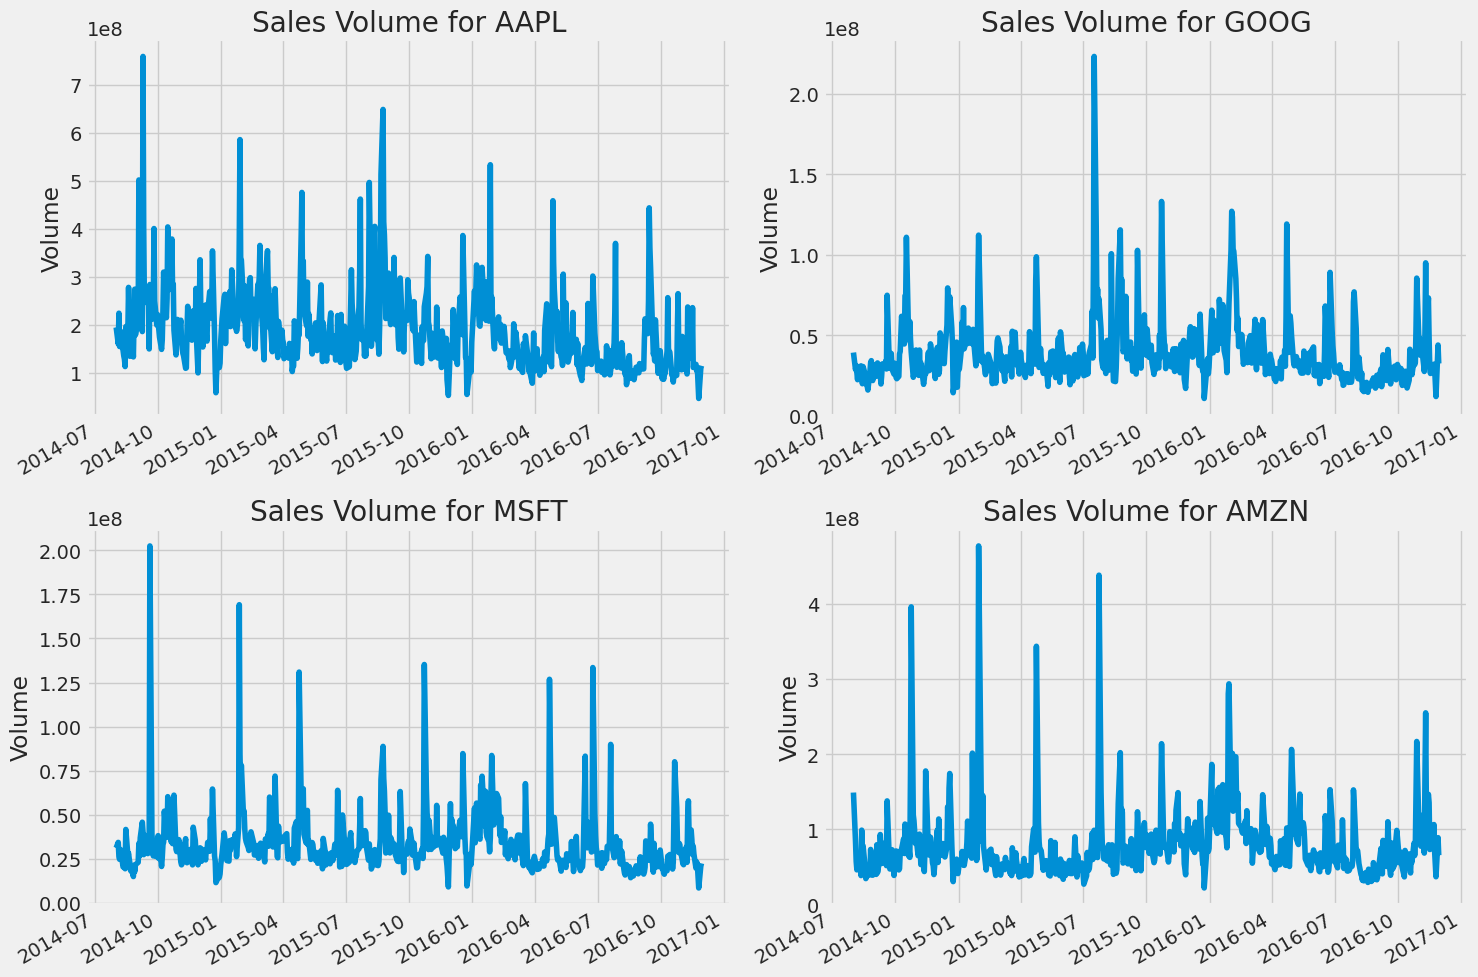

In [4]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# Moving Average For Each Stock

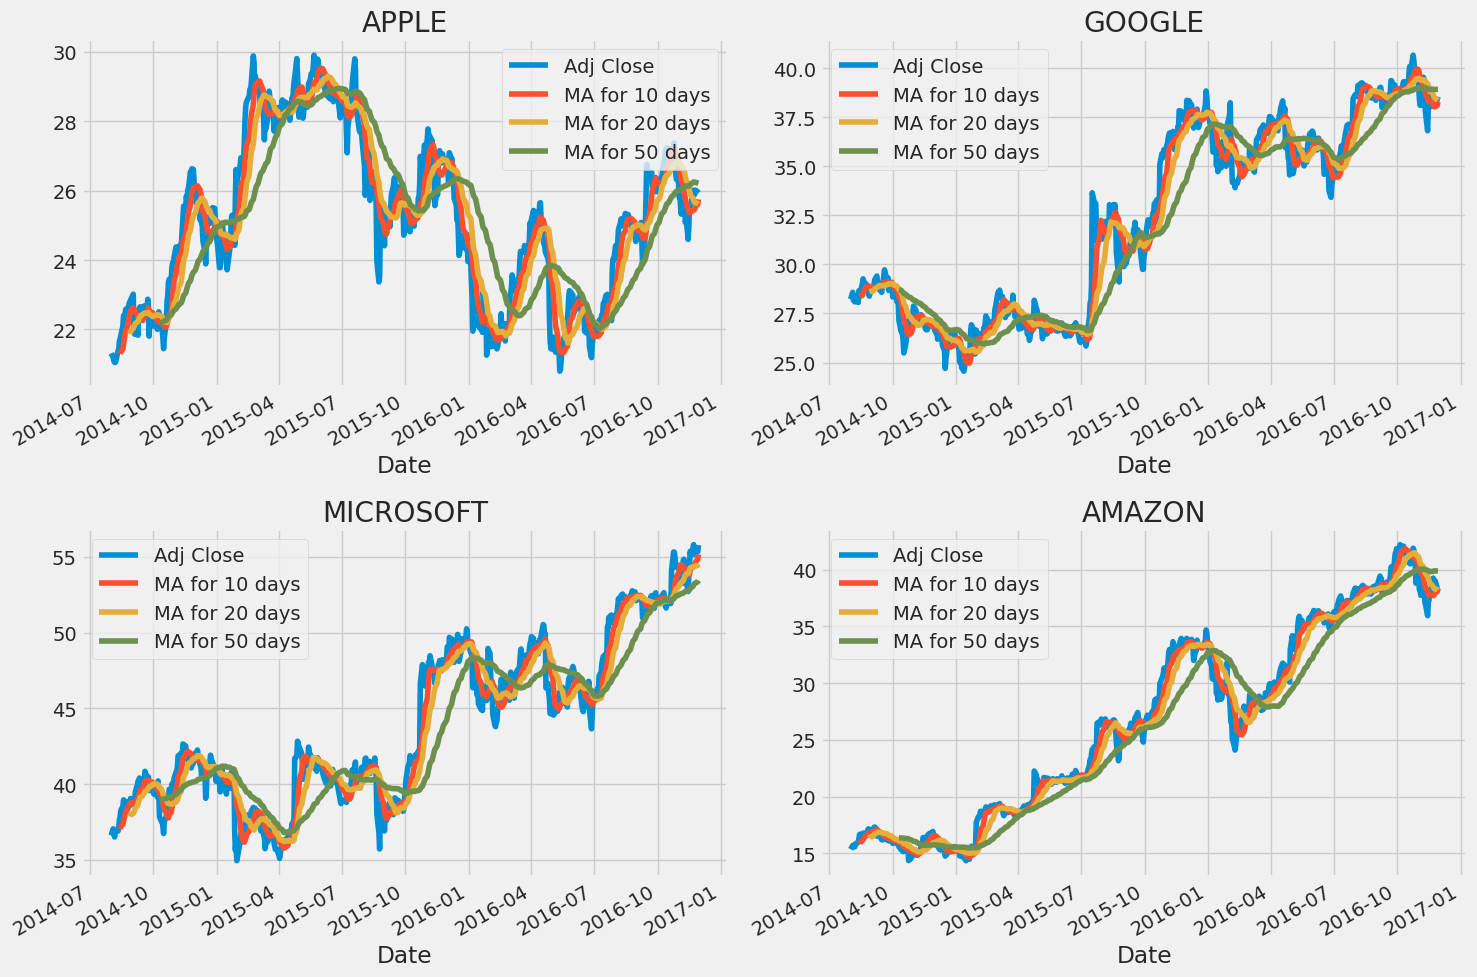

In [5]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
fig.tight_layout()

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2014-08-01,23.725000,24.155001,23.702499,24.032499,21.313589,194044000,APPLE
1,2014-08-04,24.092501,24.145000,23.792500,23.897499,21.193857,159832000,APPLE
2,2014-08-05,23.840000,23.920000,23.590000,23.780001,21.089655,223732000,APPLE
3,2014-08-06,23.687500,23.870001,23.677500,23.740000,21.054176,154232000,APPLE
4,2014-08-07,23.732500,23.987499,23.525000,23.620001,21.051950,186844000,APPLE
...,...,...,...,...,...,...,...,...
2347,2016-11-22,39.408501,39.619999,39.049999,39.266499,39.266499,106226000,AMAZON
2348,2016-11-23,39.086498,39.087502,38.655998,39.006001,39.006001,70806000,AMAZON
2349,2016-11-25,39.325001,39.337502,38.895000,39.018501,39.018501,36742000,AMAZON
2350,2016-11-28,38.849499,38.849998,38.212002,38.338501,38.338501,88776000,AMAZON


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2014-08-01,23.725000,24.155001,23.702499,24.032499,21.313589,194044000,APPLE
1,2014-08-04,24.092501,24.145000,23.792500,23.897499,21.193857,159832000,APPLE
2,2014-08-05,23.840000,23.920000,23.590000,23.780001,21.089655,223732000,APPLE
3,2014-08-06,23.687500,23.870001,23.677500,23.740000,21.054176,154232000,APPLE
4,2014-08-07,23.732500,23.987499,23.525000,23.620001,21.051950,186844000,APPLE
...,...,...,...,...,...,...,...,...
2347,2016-11-22,39.408501,39.619999,39.049999,39.266499,39.266499,106226000,AMAZON
2348,2016-11-23,39.086498,39.087502,38.655998,39.006001,39.006001,70806000,AMAZON
2349,2016-11-25,39.325001,39.337502,38.895000,39.018501,39.018501,36742000,AMAZON
2350,2016-11-28,38.849499,38.849998,38.212002,38.338501,38.338501,88776000,AMAZON


# Splitting into Dataframes

In [8]:
import pandas as pd
grouped = df.groupby('company_name')
dfs = {key: group for key, group in grouped}
for key, value in dfs.items():
    print(f"DataFrame for Column1 value {key}:\n{value}\n")


DataFrame for Column1 value AMAZON:
           Date       Open       High        Low      Close  Adj Close  \
1764 2014-08-01  15.684500  15.791500  15.229500  15.353000  15.353000   
1765 2014-08-04  15.442000  15.809000  15.425000  15.682500  15.682500   
1766 2014-08-05  15.665000  15.727500  15.503000  15.616000  15.616000   
1767 2014-08-06  15.541500  15.789000  15.510000  15.694500  15.694500   
1768 2014-08-07  15.760500  15.794000  15.482500  15.572500  15.572500   
...         ...        ...        ...        ...        ...        ...   
2347 2016-11-22  39.408501  39.619999  39.049999  39.266499  39.266499   
2348 2016-11-23  39.086498  39.087502  38.655998  39.006001  39.006001   
2349 2016-11-25  39.325001  39.337502  38.895000  39.018501  39.018501   
2350 2016-11-28  38.849499  38.849998  38.212002  38.338501  38.338501   
2351 2016-11-29  38.400002  38.494499  38.066002  38.125999  38.125999   

         Volume company_name  
1764  148830000       AMAZON  
1765   840180

In [9]:
dfs.keys()

dict_keys(['AMAZON', 'APPLE', 'GOOGLE', 'MICROSOFT'])

In [10]:
amazon_df = dfs["AMAZON"]
apple_df = dfs["APPLE"]
google_df = dfs["GOOGLE"]
mic_df = dfs["MICROSOFT"]

In [11]:
amazon_df.reset_index(inplace = True)
apple_df.reset_index(inplace = True)
google_df.reset_index(inplace = True)
mic_df.reset_index(inplace = True)

# LSTM

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

def LSTM_output(dataframeinp):
  data = dataframeinp.filter(['Close'])
  dataset = data.values
  training_data_len = int(np.ceil( len(dataset) * .95 ))
  print(training_data_len)
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  #print(scaled_data)

  train_data = scaled_data[0:int(training_data_len), :]
  x_train = []
  y_train = []
  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])
      if i<= 61:
          #print(x_train)
          #print(y_train)
          print()

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))
  print(model.summary())
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, batch_size=1, epochs=8)
  test_data = scaled_data[training_data_len - 60: , :]
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
  print(rmse)
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()

559


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 25)                1625      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/8
499/499 [==============================] - 31s 56ms/step - loss: 0.0108
Epoch 2/8
499/499 [==============================] - 

<ipython-input-29-3c53e8d39bb4>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


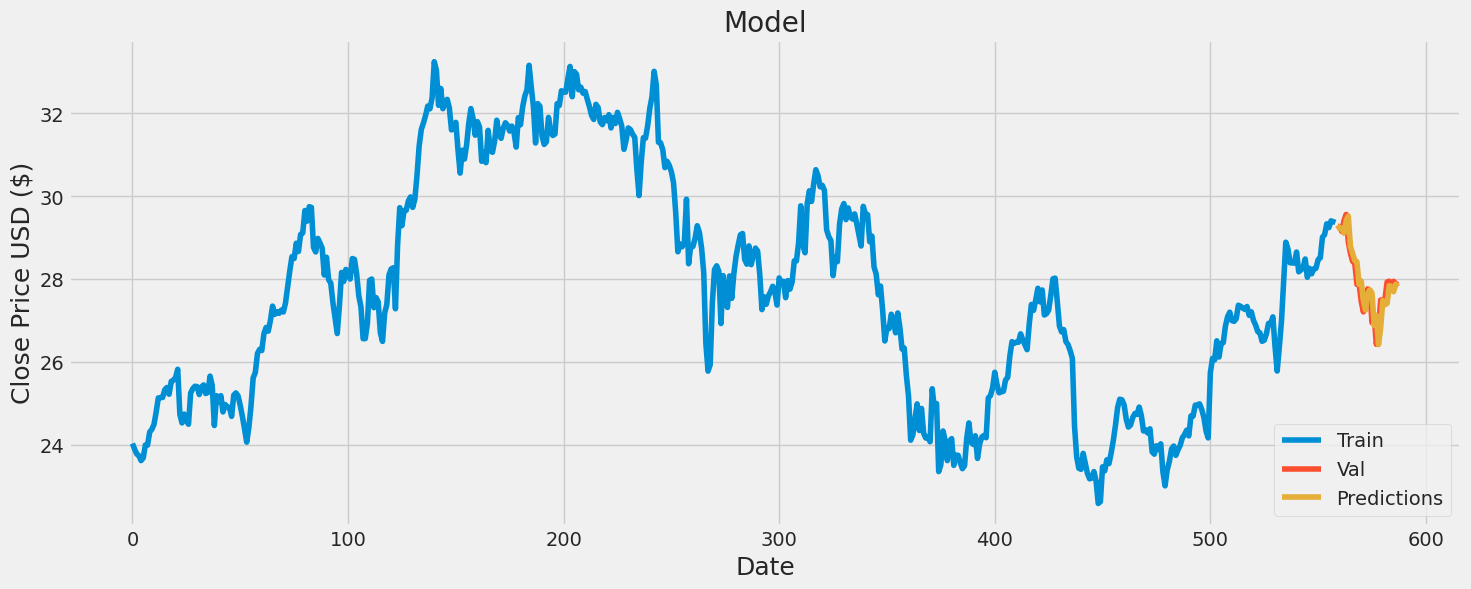

In [30]:
LSTM_output(apple_df)

559


Epoch 1/8
499/499 [==============================] - 31s 57ms/step - loss: 0.0070
Epoch 2/8
499/499 [==============================] - 29s 58ms/step - loss: 0.0040
Epoch 3/8
499/499 [==============================] - 30s 59ms/step - loss: 0.0026
Epoch 4/8
499/499 [==============================] - 55s 110ms/step - loss: 0.0022
Epoch 5/8
499/499 [==============================] - 31s 62ms/step - loss: 0.0020
Epoch 6/8
499/499 [==============================] - 28s 56ms/step - loss: 0.0020
Epoch 7/8
499/499 [==============================] - 28s 57ms/step - loss: 0.0017
Epoch 8/8
499/499 [==============================] - 28s 57ms/step - loss: 0.0016


1/1 [==============================] - 1s 824ms/step


<ipython-input-18-cd31eae1b841>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


0.914621687584412


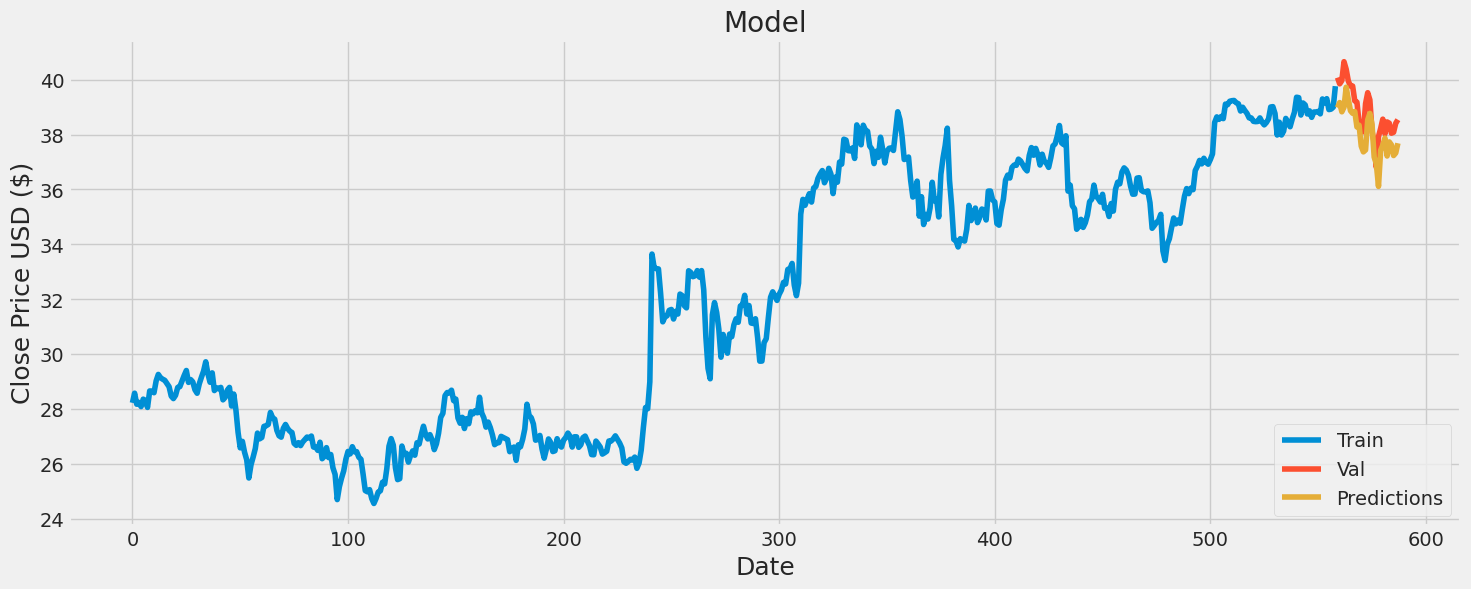

In [20]:
LSTM_output(google_df)

559


Epoch 1/8
499/499 [==============================] - 32s 54ms/step - loss: 0.0051
Epoch 2/8
499/499 [==============================] - 27s 54ms/step - loss: 0.0022
Epoch 3/8
499/499 [==============================] - 28s 57ms/step - loss: 0.0015
Epoch 4/8
499/499 [==============================] - 28s 56ms/step - loss: 0.0013
Epoch 5/8
499/499 [==============================] - 28s 56ms/step - loss: 0.0010
Epoch 6/8
499/499 [==============================] - 28s 56ms/step - loss: 0.0011
Epoch 7/8
499/499 [==============================] - 30s 61ms/step - loss: 8.6007e-04
Epoch 8/8
1/1 [==============================] - 1s 805ms/step
0.8435669834323726


<ipython-input-18-cd31eae1b841>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


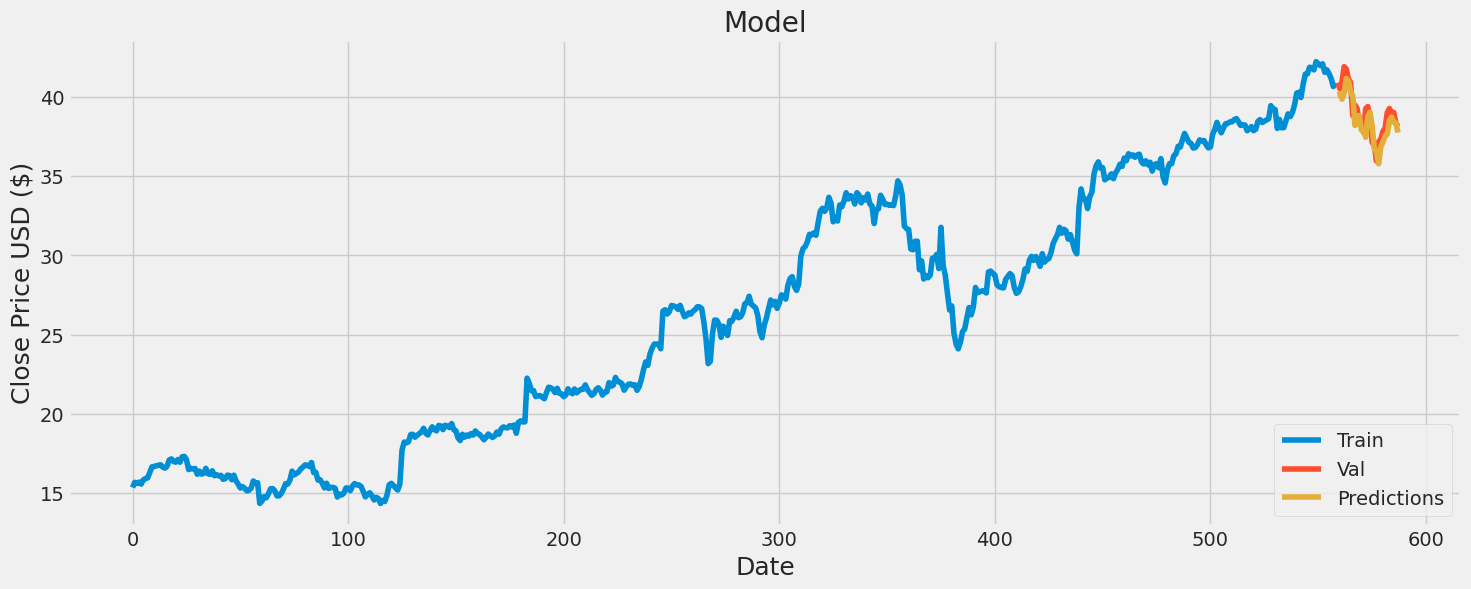

In [21]:
LSTM_output(amazon_df)

559


Epoch 1/8
499/499 [==============================] - 32s 56ms/step - loss: 0.0100
Epoch 2/8
499/499 [==============================] - 28s 56ms/step - loss: 0.0037
Epoch 3/8
499/499 [==============================] - 28s 56ms/step - loss: 0.0027
Epoch 4/8
499/499 [==============================] - 28s 56ms/step - loss: 0.0023
Epoch 5/8
499/499 [==============================] - 27s 53ms/step - loss: 0.0021
Epoch 6/8
499/499 [==============================] - 27s 54ms/step - loss: 0.0024
Epoch 7/8
499/499 [==============================] - 28s 56ms/step - loss: 0.0021
Epoch 8/8
1/1 [==============================] - 1s 788ms/step
1.7454765778326946


<ipython-input-18-cd31eae1b841>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


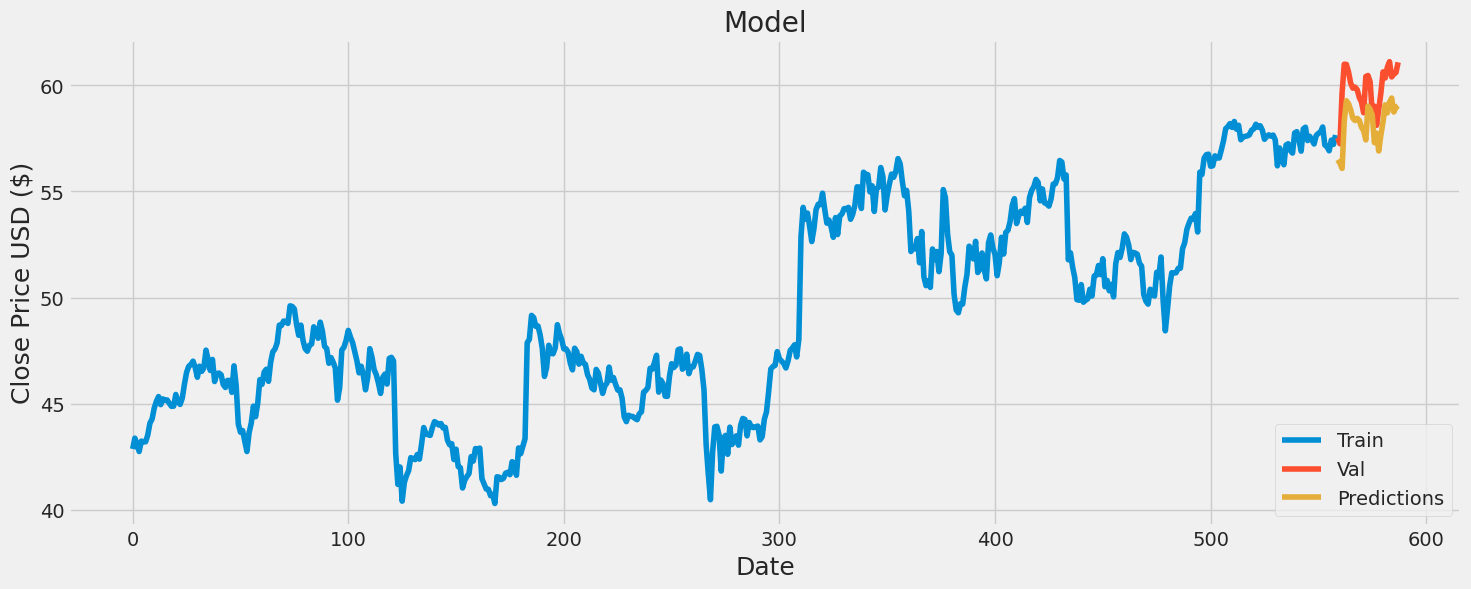

In [22]:
LSTM_output(mic_df)

# ARIMA

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

def arima(inputdf):
  train_data, test_data = inputdf[0:int(len(inputdf)*0.8)], inputdf[int(len(inputdf)*0.8):]
  plt.figure(figsize=(12,7))
  plt.title('Prices')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.plot(inputdf['Open'], 'blue', label='Training Data')
  plt.plot(test_data['Open'], 'green', label='Testing Data')
  plt.xticks(np.arange(0,587, 200), inputdf['Date'][0:587:200])
  plt.legend()
  train_ar = train_data['Open'].values
  test_ar = test_data['Open'].values

  history = [x for x in train_ar]
  print(type(history))
  predictions = list()

  print(len(test_ar))
  for t in range(118):
      model = ARIMA(history, order=(5,1,0))
      model_fit = model.fit()
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test_ar[t]
      history.append(obs)

  error = mean_squared_error(test_ar, predictions)
  print('Testing Mean Squared Error: %.3f' % error)
  error2 = smape_kun(test_ar, predictions)
  print('Symmetric mean absolute percentage error: %.3f' % error2)
  plt.figure(figsize=(12,7))
  plt.plot(inputdf['Open'], 'green', color='blue', label='Training Data')
  plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
          label='Predicted Price')
  plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
  plt.title('Prices Prediction')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.xticks(np.arange(0,587,200), inputdf['Date'][0:587:200])
  plt.legend()



<ipython-input-23-3d75970decff>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<class 'list'>
118
Testing Mean Squared Error: 0.157
Symmetric mean absolute percentage error: 0.765


<ipython-input-23-3d75970decff>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(inputdf['Open'], 'green', color='blue', label='Training Data')


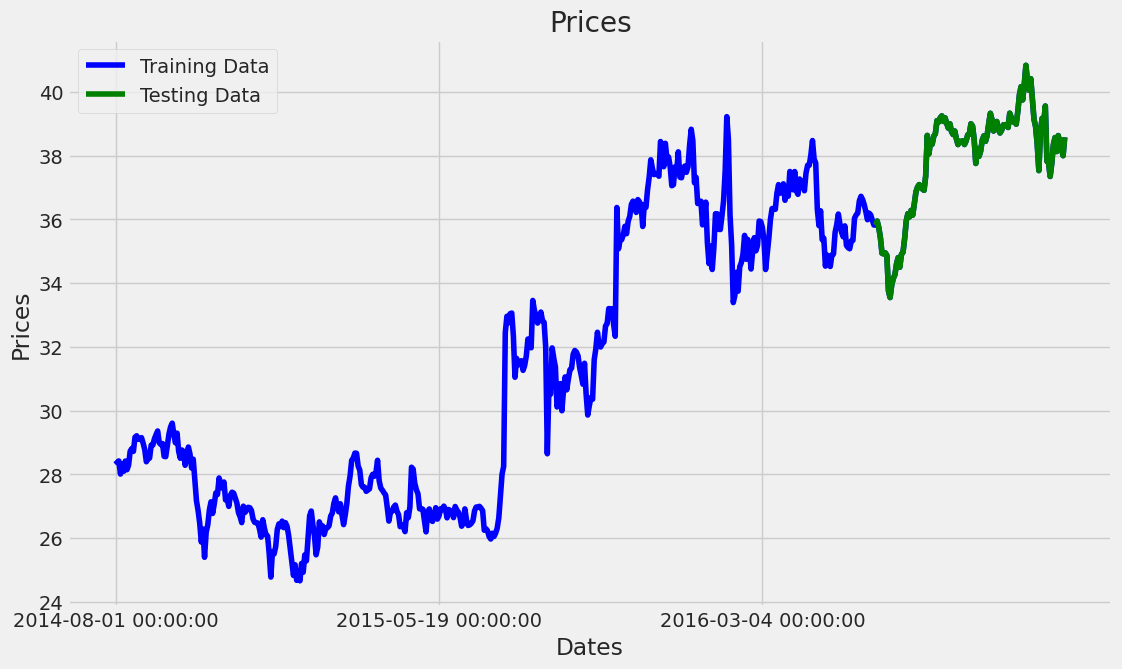

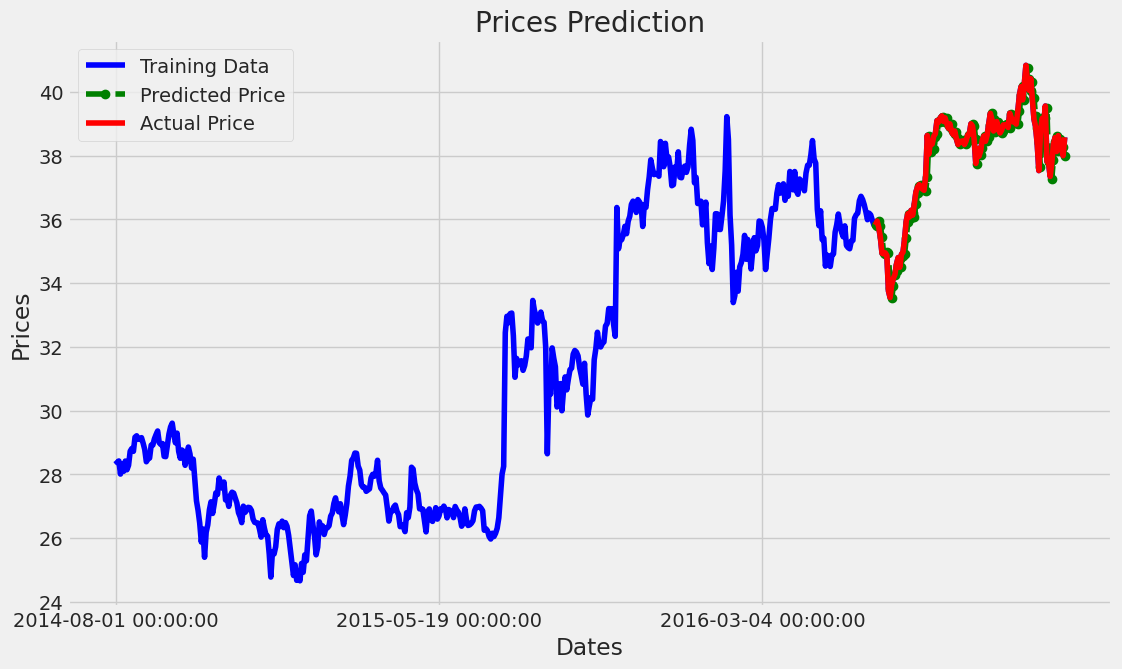

In [24]:
arima(google_df)

<class 'list'>
118
Testing Mean Squared Error: 0.138
Symmetric mean absolute percentage error: 0.932


<ipython-input-23-3d75970decff>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(inputdf['Open'], 'green', color='blue', label='Training Data')


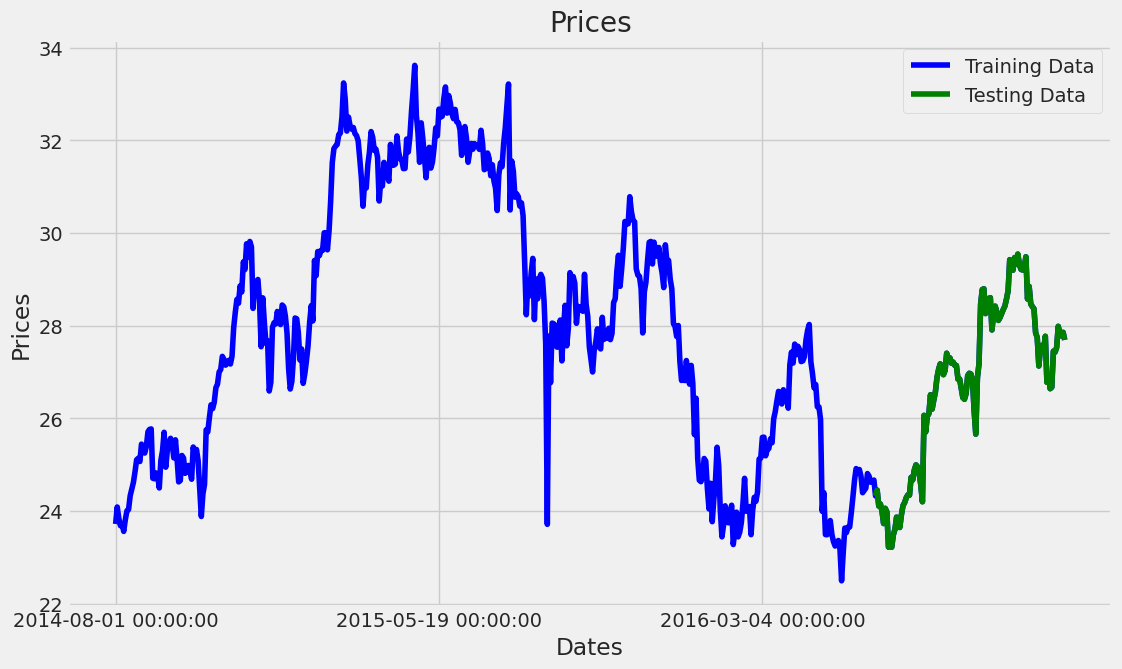

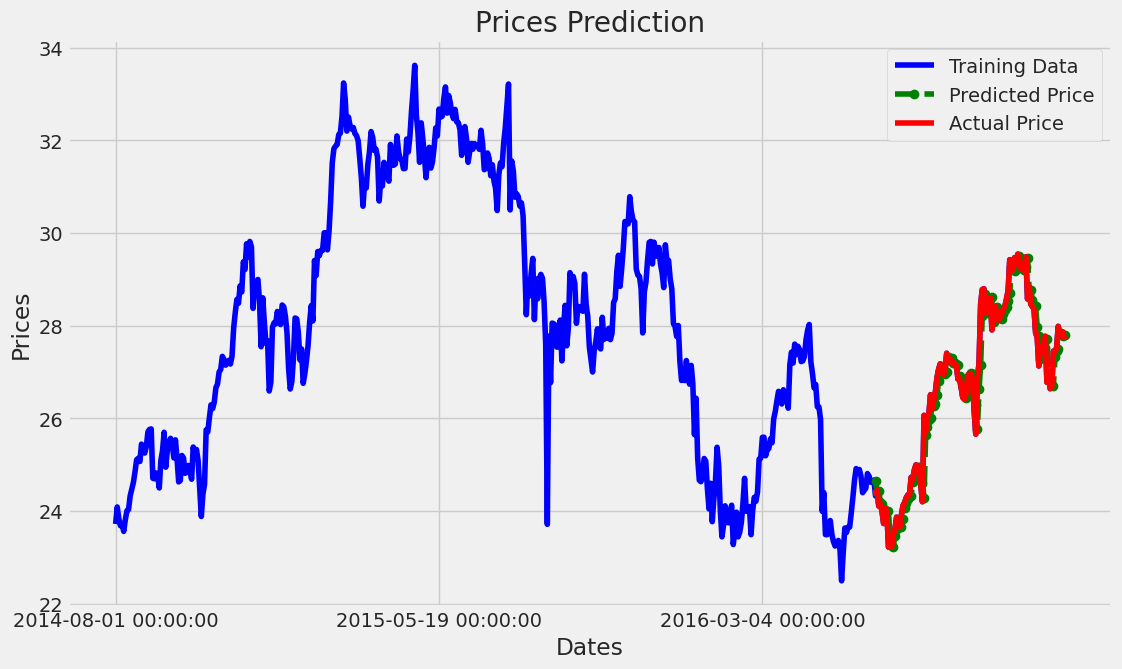

In [25]:
arima(apple_df)

<class 'list'>
118
Testing Mean Squared Error: 0.277
Symmetric mean absolute percentage error: 0.971


<ipython-input-23-3d75970decff>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(inputdf['Open'], 'green', color='blue', label='Training Data')


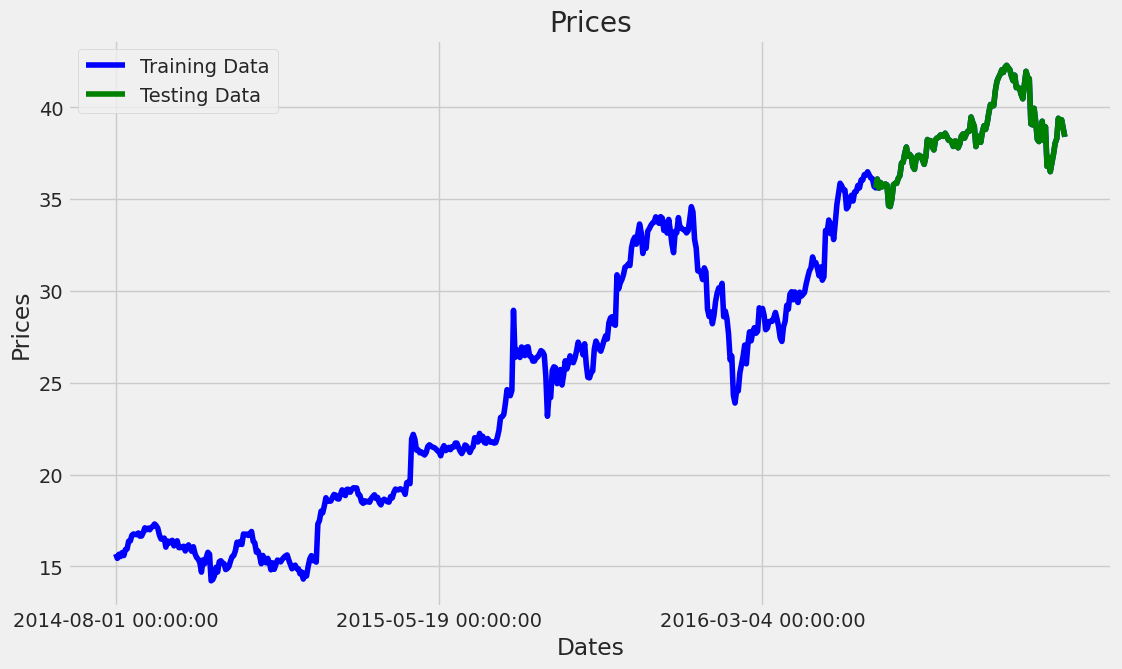

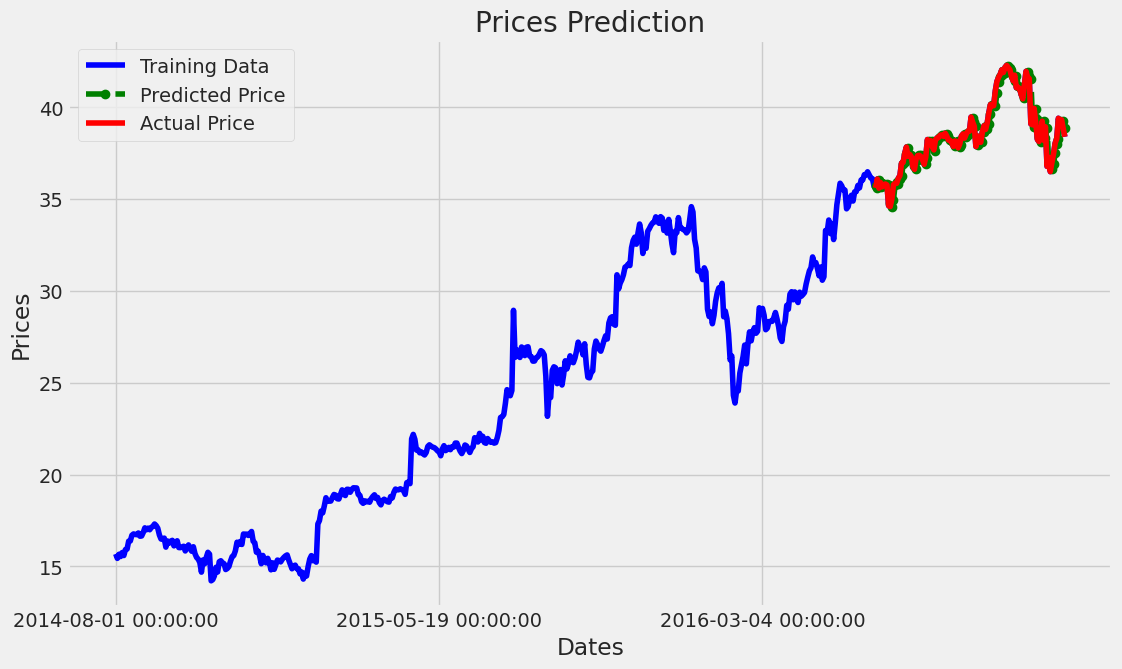

In [26]:
arima(amazon_df)

<class 'list'>
118
Testing Mean Squared Error: 0.399
Symmetric mean absolute percentage error: 0.755


<ipython-input-23-3d75970decff>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(inputdf['Open'], 'green', color='blue', label='Training Data')


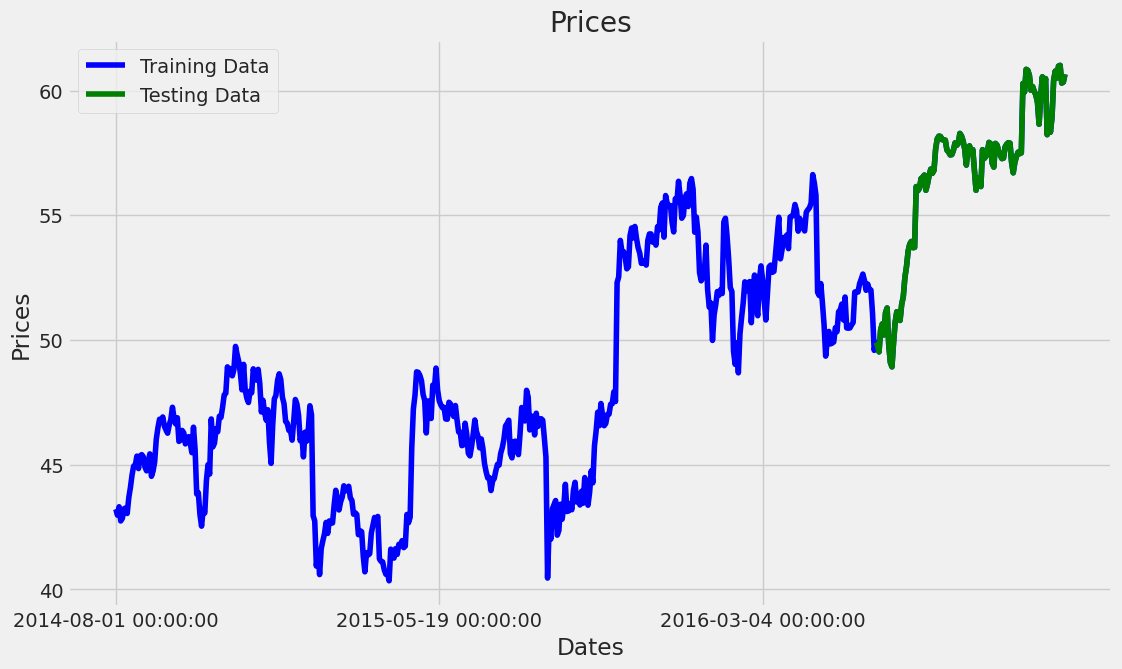

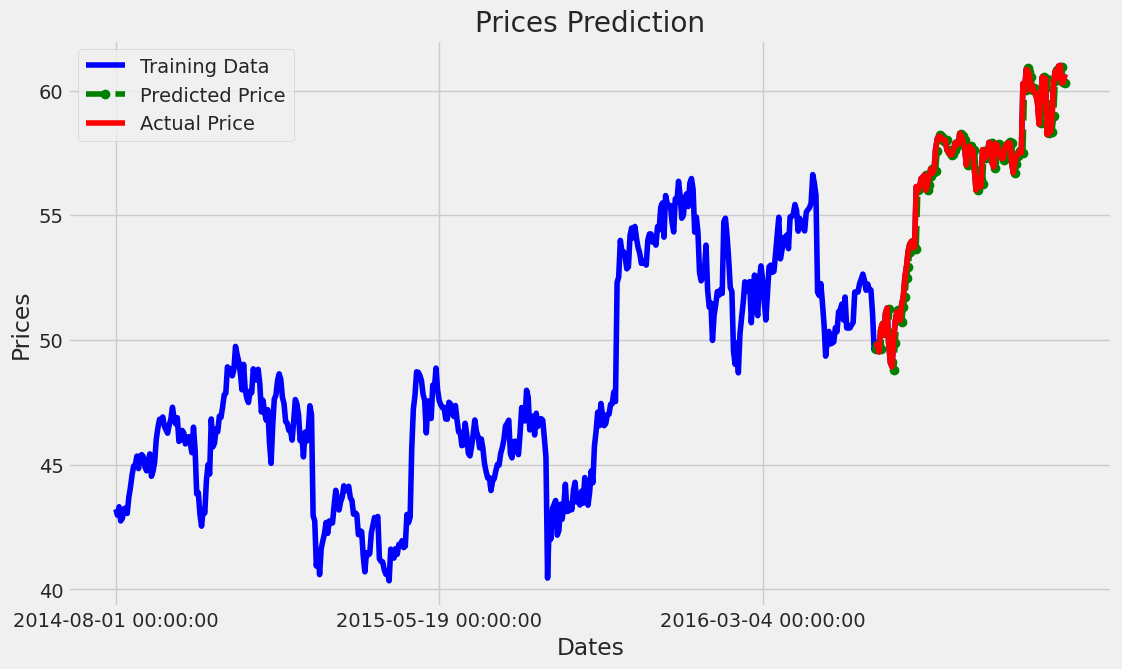

In [27]:
arima(mic_df)

# GRU

In [33]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

time_step = 15

def GRU_output(dataframeinp):
  data = dataframeinp.filter(['Close'])
  dataset = data.values
  training_data_len = int(np.ceil( len(dataset) * .95 ))
  print(training_data_len)
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  #print(scaled_data)

  train_data = scaled_data[0:int(training_data_len), :]
  x_train = []
  y_train = []
  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])
      if i<= 61:
          #print(x_train)
          #print(y_train)
          print()

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  model = Sequential()
  model.add(GRU(32,return_sequences=True))
  model.add(GRU(32,return_sequences=True))
  model.add(GRU(32))
  model.add(Dropout(0.20))
  model.add(Dense(1))
  print(model.summary())

  model.compile(optimizer='adam', loss='mean_squared_error')

  model.fit(x_train, y_train, batch_size=1, epochs=5)
  test_data = scaled_data[training_data_len - 60: , :]
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
  print(rmse)
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()

559


Epoch 1/5
499/499 [==============================] - 26s 41ms/step - loss: 0.0130
Epoch 2/5
499/499 [==============================] - 23s 45ms/step - loss: 0.0046
Epoch 3/5
499/499 [==============================] - 21s 41ms/step - loss: 0.0046
Epoch 4/5
499/499 [==============================] - 22s 44ms/step - loss: 0.0036
Epoch 5/5
1/1 [==============================] - 2s 2s/step
0.867522892171507


<ipython-input-13-ca14f80a58b0>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


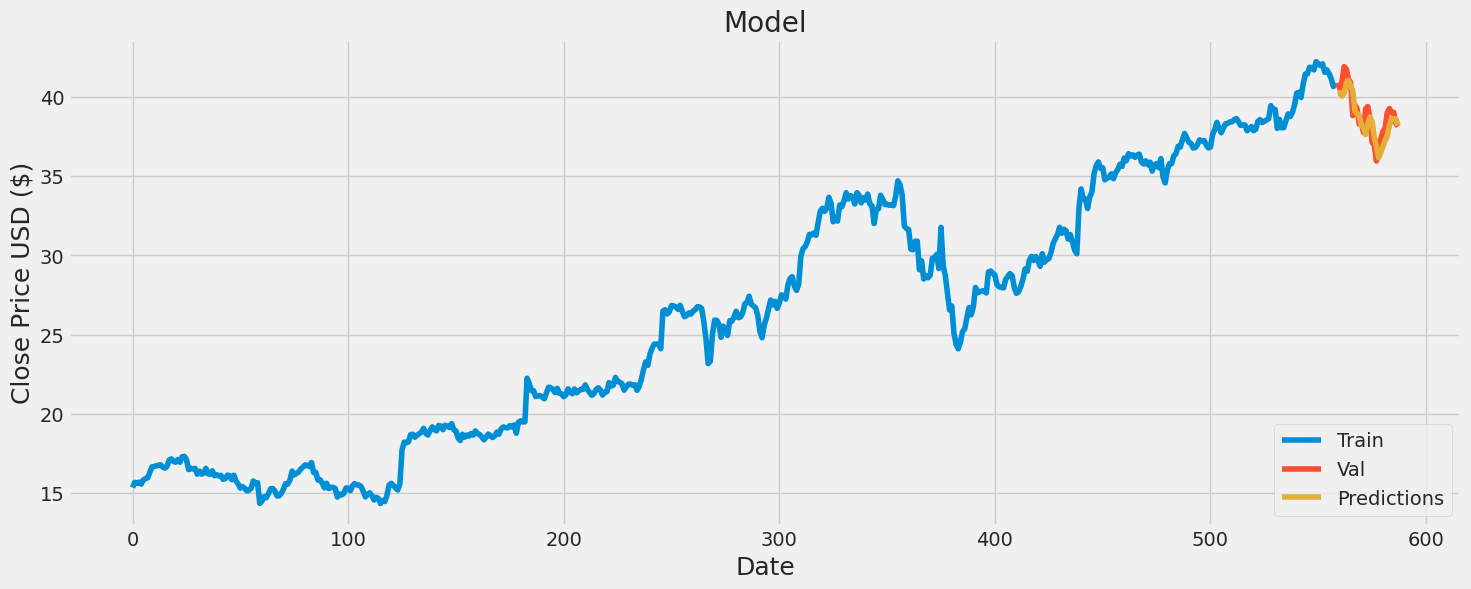

In [15]:
GRU_output(amazon_df)

559


Epoch 1/5
499/499 [==============================] - 44s 55ms/step - loss: 0.0130
Epoch 2/5
499/499 [==============================] - 21s 41ms/step - loss: 0.0069
Epoch 3/5
499/499 [==============================] - 25s 50ms/step - loss: 0.0060
Epoch 4/5
499/499 [==============================] - 22s 45ms/step - loss: 0.0053
Epoch 5/5
1/1 [==============================] - 2s 2s/step
0.5569051768020283


<ipython-input-13-ca14f80a58b0>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


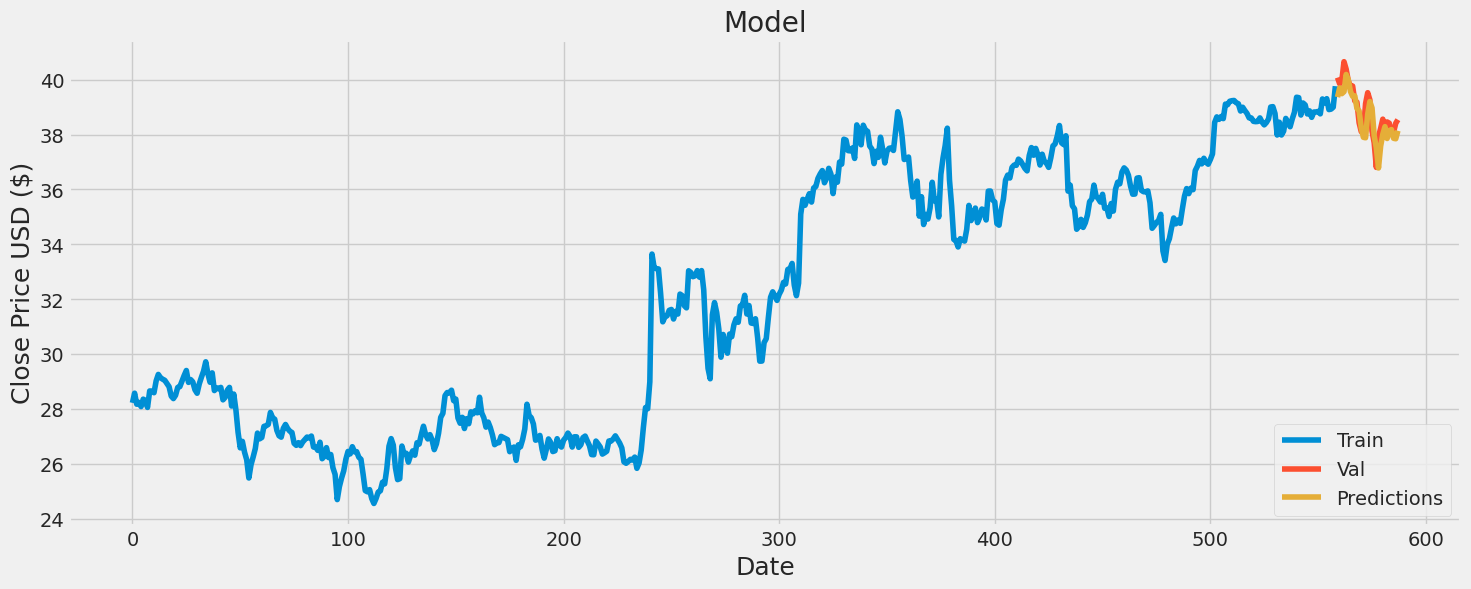

In [16]:
GRU_output(google_df)

559


Epoch 1/5
499/499 [==============================] - 30s 48ms/step - loss: 0.0123
Epoch 2/5
499/499 [==============================] - 22s 45ms/step - loss: 0.0067
Epoch 3/5
499/499 [==============================] - 21s 42ms/step - loss: 0.0060
Epoch 4/5
499/499 [==============================] - 21s 41ms/step - loss: 0.0055
Epoch 5/5
1/1 [==============================] - 3s 3s/step
1.0928697917057149


<ipython-input-13-ca14f80a58b0>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


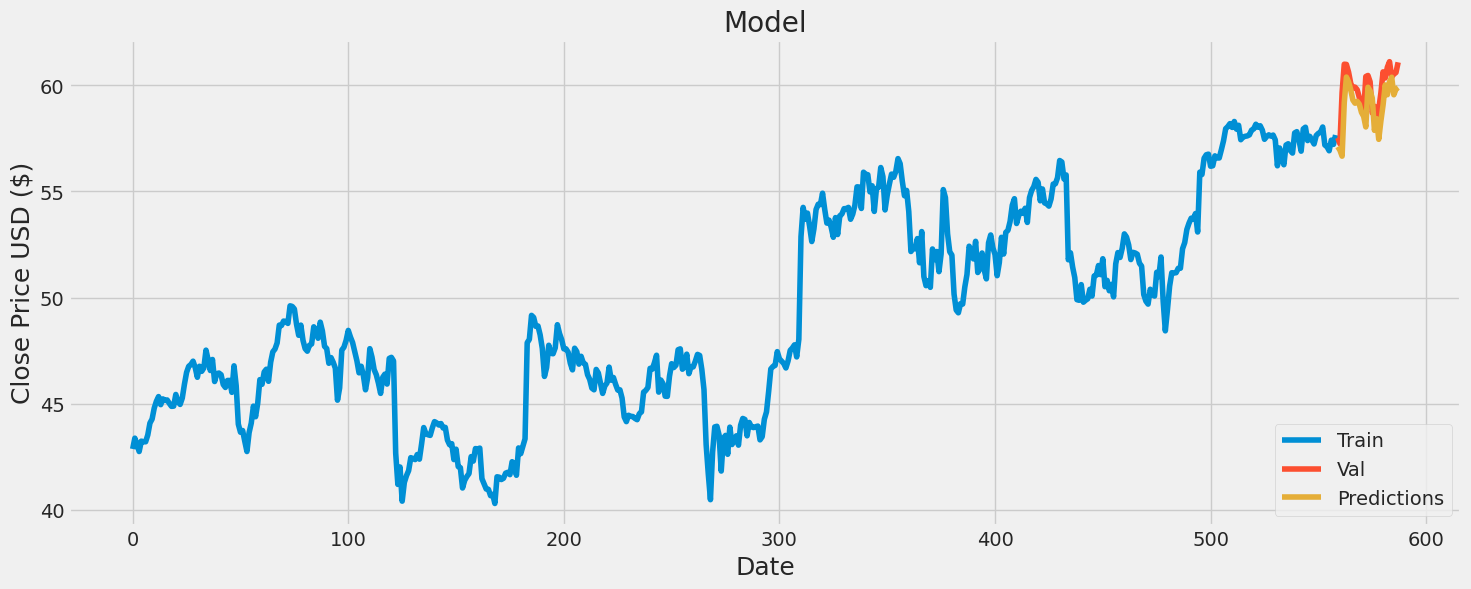

In [17]:
GRU_output(mic_df)

559


Epoch 1/5
499/499 [==============================] - 29s 47ms/step - loss: 0.0171
Epoch 2/5
499/499 [==============================] - 23s 46ms/step - loss: 0.0081
Epoch 3/5
499/499 [==============================] - 23s 47ms/step - loss: 0.0069
Epoch 4/5
499/499 [==============================] - 21s 42ms/step - loss: 0.0062
Epoch 5/5
1/1 [==============================] - 2s 2s/step
0.34520543025731387


<ipython-input-44-d8a268100e97>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


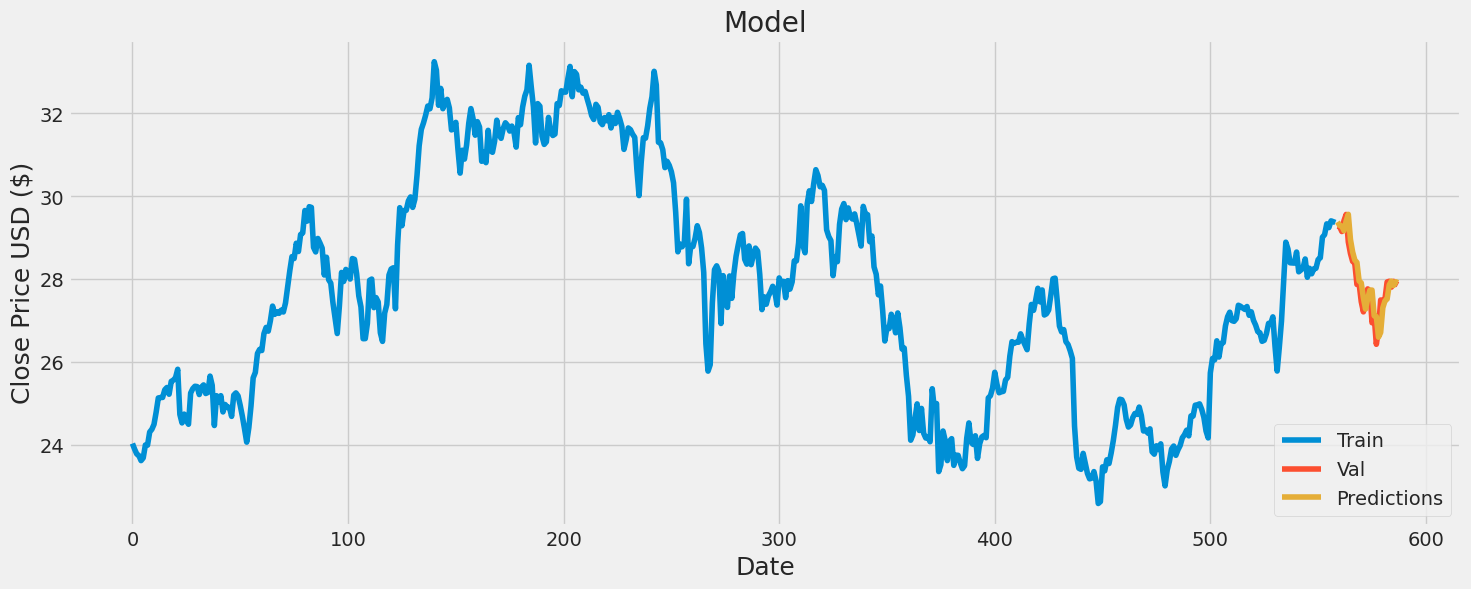

In [45]:
GRU_output(apple_df)